# Exploratory Data Analysis (EDA) Template
# 1. Importación de Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv

# Cargar el Dataset

In [3]:
df = pd.read_csv(r"C:\Users\javie\Downloads\bank_dataset.CSV")


# Muestro la estructura del DF

In [4]:
df.shape

(11162, 17)

Se observa que el Df cuenta con un total de 11162 registros (filas) que a su vez cuentan de 17 columnas. 

# Muestra las primeras filas del dataset

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Información general del Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


# Descripción estadística del Dataset

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Histograma de cada variable numérica

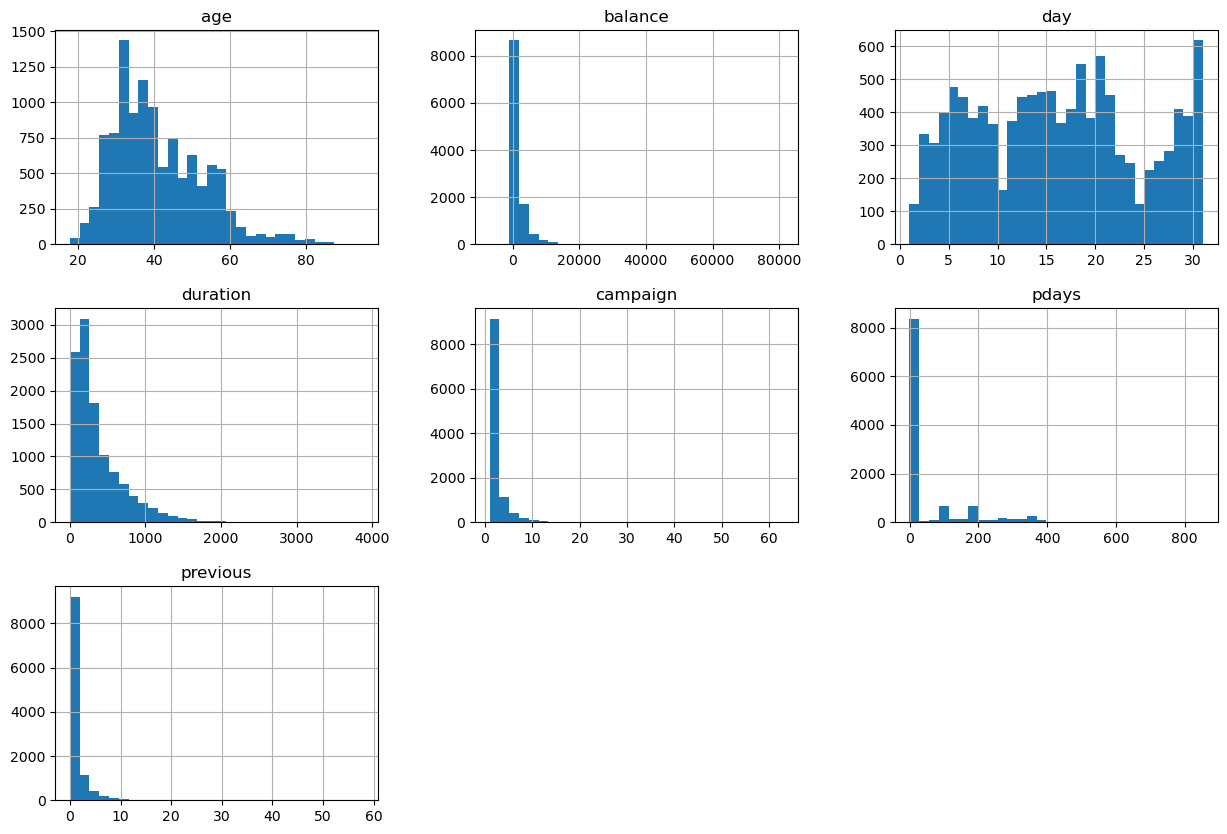

In [9]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Contar los valores de cada variable categórica

In [10]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"La variable {column.upper()} tiene categorias: {df[column].nunique()}\
    \n{df[column].value_counts()}\
    \n \n------------------------\n")

La variable JOB tiene categorias: 12    
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64    
 
------------------------

La variable MARITAL tiene categorias: 3    
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64    
 
------------------------

La variable EDUCATION tiene categorias: 4    
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64    
 
------------------------

La variable DEFAULT tiene categorias: 2    
default
no     10994
yes      168
Name: count, dtype: int64    
 
------------------------

La variable HOUSING tiene categorias: 2    
housing
no     5881
yes    5281
Name: count, dtype: int64    
 
------------------------

La variable LOAN

# Contar los valores nulos por columnas

In [11]:
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

Observamos que tenemos variables nulas en age, marital y education haciendo un total de 22 nulos que representan < 1% por lo que considero que no representa un valor significativo como para que afecte al modelo o análisis que fuera a hacer con estos datos. Pero a manera de práctica remplazaré esos valores utilizando la mediana y la moda para asemejarlos lo más posible con las coincidencias que crea pueden ser más acertadas, tomando en cuenta el valor de otras columnas como job que en algunos casos nos puede asemejar más el perfil del cliente.

# Visualizar los registros que tienen algún valor nulo

In [12]:
nulos = df['age'].isnull() | df['marital'].isnull() | df['education'].isnull()
df[nulos]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1088,53.0,management,NaN,secondary,no,1004,no,yes,telephone,22,dec,119,1,-1,0,unknown,yes
1181,NaN,management,married,tertiary,no,309,yes,no,cellular,5,feb,676,1,-1,0,unknown,yes
1300,37.0,technician,married,NaN,no,549,no,no,cellular,2,mar,239,1,-1,0,unknown,yes
1410,NaN,blue-collar,married,primary,no,4979,no,no,telephone,6,apr,180,1,-1,0,unknown,yes
2943,24.0,student,single,NaN,no,382,no,no,cellular,13,nov,256,2,92,3,failure,yes
3719,68.0,retired,NaN,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
4019,NaN,services,single,secondary,no,1934,no,no,cellular,29,sep,271,1,-1,0,unknown,yes
4737,37.0,management,single,NaN,no,102,yes,no,cellular,6,may,445,1,258,2,failure,yes
4854,34.0,management,NaN,tertiary,no,5,no,no,cellular,18,aug,370,2,-1,0,unknown,yes
5680,NaN,technician,single,tertiary,no,720,no,no,cellular,12,aug,234,4,-1,0,unknown,no


# Sustituyo los nulos de la edad por su moda teniendo en cuenta los campos de job, marital y education ajustando los perfiles de coincidencia 

In [13]:
mediana_age = df.groupby(["job", "marital", "education"])["age"].transform(lambda x: x.median() if not x.isnull().all() else x)
df["age"] = df["age"].fillna(mediana_age.round())

# Sustituyo los nulos de marital con la moda de los registros teniendo en cuenta la edad y el trabajo para ajustar un poco más la coincidencia

In [23]:
moda_marital = df.groupby(["job", "age"])["marital"].transform(lambda x: x.mode()[0] if not x.isnull().all() else np.nan)
df["marital"] = df["marital"].fillna(moda_marital)

# Sustituyo los nulos de education con la moda de los registros que tengan la misma edad y trabajo para ajustar la coincidencia

In [15]:
moda_education = df.groupby(["job", "age"])["education"].transform(lambda x: x.mode().iloc[0] if not x.isnull().all() else np.nan)
df["education"] = df["education"].fillna(moda_education)

# Vuelvo a contar los valores nulos para comprobar de que han sido sustituidos

In [24]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Deteccion de outliers

Esta vez se puede comprobar de que los 22 valores nulos que teniamos anteriormente han sido sustituidos con éxito en el DF

Outliers detectados en 'age':
        age      job   marital  education default  balance housing loan  \
1162   75.0  retired  divorced    primary      no     3881     yes   no   
1236   85.0  retired   married    primary      no    12114      no   no   
1243   90.0  retired  divorced  secondary      no        1      no   no   
1274   85.0  retired  divorced    primary      no     7613      no   no   
1320   83.0  retired  divorced    primary      no     1097      no   no   
...     ...      ...       ...        ...     ...      ...     ...  ...   
10438  77.0  retired   married    primary      no     1492      no   no   
10562  88.0  retired   married    primary      no      648      no   no   
10570  77.0  unknown   married    unknown      no      397      no   no   
10618  78.0  retired   married    primary      no      680      no   no   
10843  86.0  retired  divorced    unknown      no      157      no   no   

         contact  day month  duration  campaign  pdays  previous pout

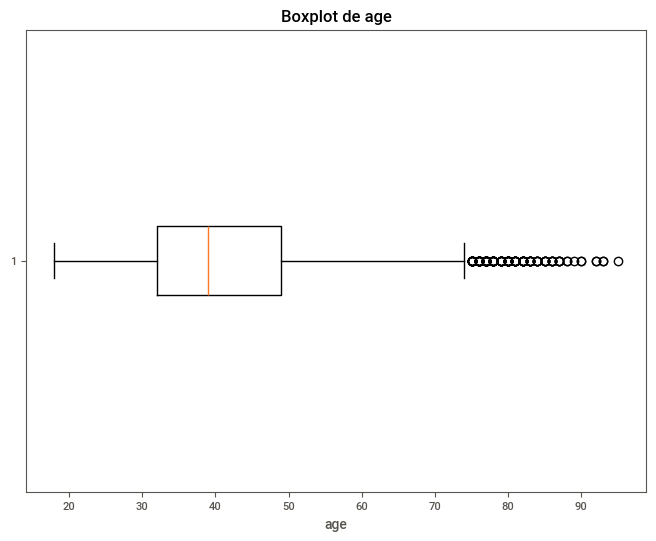

Outliers detectados en 'balance':
        age          job   marital  education default  balance housing loan  \
9      28.0     services    single  secondary      no     5090     yes   no   
60     51.0  blue-collar   married  secondary      no     7180     yes   no   
61     41.0  blue-collar  divorced  secondary      no     5291     yes   no   
69     44.0   technician   married   tertiary      no     4580     yes   no   
71     29.0   management   married   tertiary      no    10576      no   no   
...     ...          ...       ...        ...     ...      ...     ...  ...   
11073  34.0  blue-collar   married    primary      no     6718      no   no   
11077  54.0      retired  divorced   tertiary      no     6102     yes  yes   
11085  60.0   technician   married    primary      no     4243     yes   no   
11086  42.0       admin.   married  secondary      no     6445     yes   no   
11101  54.0  blue-collar   married    primary      no     6242     yes   no   

        contact  

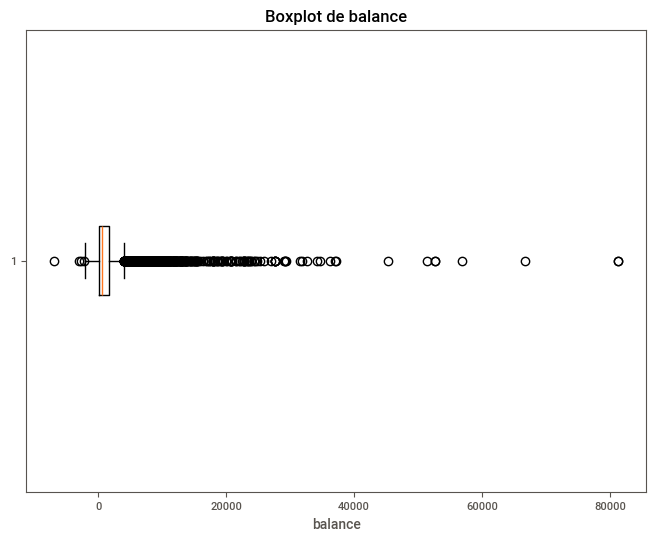

Outliers detectados en 'day':
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, deposit]
Index: []


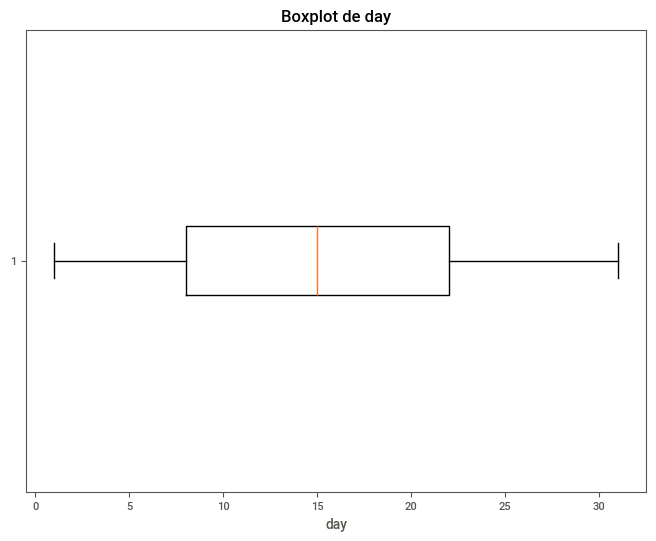

Outliers detectados en 'duration':
        age          job   marital  education default  balance housing loan  \
0      59.0       admin.   married  secondary      no     2343     yes   no   
1      56.0       admin.   married  secondary      no       45      no   no   
2      41.0   technician   married  secondary      no     1270     yes   no   
6      56.0   management   married   tertiary      no      830     yes  yes   
9      28.0     services    single  secondary      no     5090     yes   no   
...     ...          ...       ...        ...     ...      ...     ...  ...   
10647  31.0   technician    single  secondary      no      433      no   no   
10788  41.0  blue-collar   married  secondary      no     4910     yes   no   
10798  67.0   technician   married  secondary      no        0      no   no   
10802  58.0   management  divorced   tertiary      no      577      no   no   
11008  56.0     services   married    unknown      no      616      no   no   

        contact 

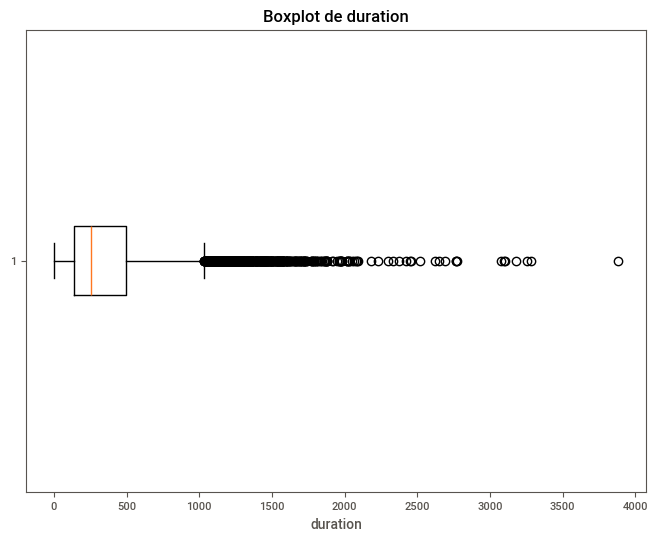

Outliers detectados en 'campaign':
        age            job   marital  education default  balance housing loan  \
125    35.0    blue-collar   married    primary      no      994     yes   no   
135    44.0     technician  divorced  secondary      no     1262     yes   no   
163    51.0   entrepreneur   married    unknown      no      606     yes   no   
186    35.0     technician  divorced  secondary      no     5724     yes   no   
187    34.0     technician  divorced  secondary      no     1451     yes   no   
...     ...            ...       ...        ...     ...      ...     ...  ...   
11057  31.0     management  divorced   tertiary      no     -547     yes  yes   
11074  37.0     management   married   tertiary      no       21      no   no   
11086  42.0         admin.   married  secondary      no     6445     yes   no   
11139  30.0  self-employed    single   tertiary      no     2593      no   no   
11140  55.0       services  divorced  secondary      no     2166     yes  

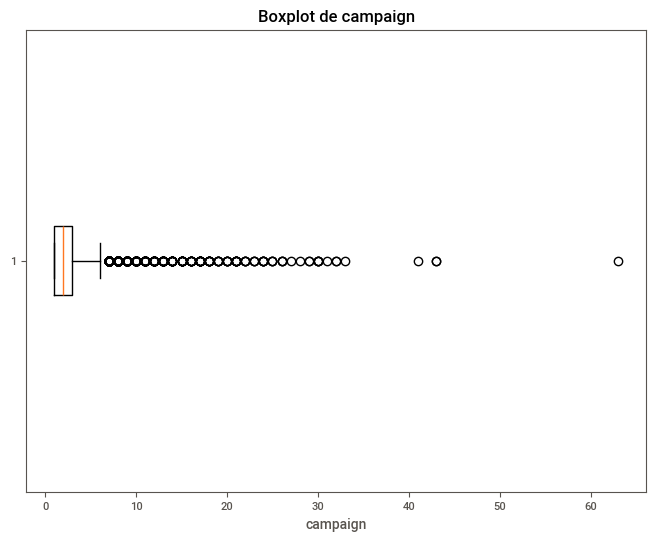

Outliers detectados en 'pdays':
        age          job   marital  education default  balance housing loan  \
890    42.0       admin.    single  secondary      no     -247     yes  yes   
891    33.0     services   married  secondary      no     3444     yes   no   
899    56.0   technician   married  secondary      no      589     yes   no   
933    34.0       admin.   married   tertiary      no      899     yes   no   
951    53.0      retired   married   tertiary      no     2269      no   no   
...     ...          ...       ...        ...     ...      ...     ...  ...   
11125  40.0  blue-collar  divorced    primary      no       54     yes   no   
11133  37.0   management   married   tertiary      no     1594     yes   no   
11145  60.0      retired  divorced   tertiary      no     -134      no   no   
11155  35.0  blue-collar   married  secondary      no       80     yes  yes   
11160  43.0   technician   married  secondary      no        0      no  yes   

         contact  d

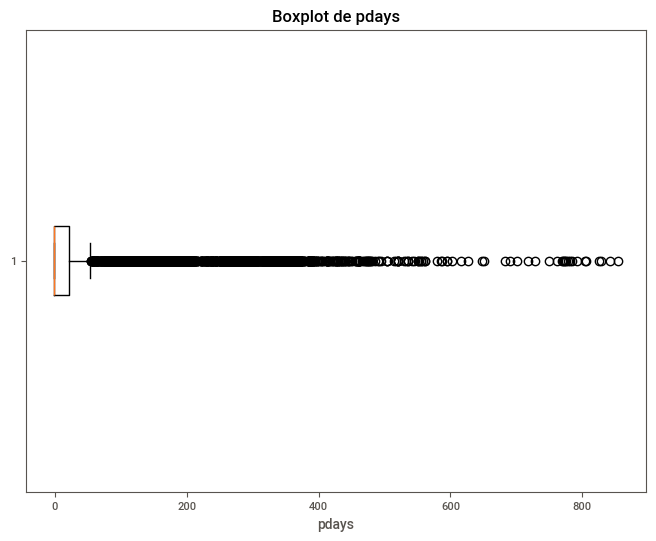

Outliers detectados en 'previous':
        age          job   marital  education default  balance housing loan  \
891    33.0     services   married  secondary      no     3444     yes   no   
933    34.0       admin.   married   tertiary      no      899     yes   no   
952    37.0   technician   married  secondary      no     5115     yes   no   
968    46.0   management   married   tertiary      no        0      no   no   
1007   33.0   technician   married   tertiary      no     6843      no   no   
...     ...          ...       ...        ...     ...      ...     ...  ...   
11092  38.0     services   married   tertiary      no        0     yes   no   
11125  40.0  blue-collar  divorced    primary      no       54     yes   no   
11133  37.0   management   married   tertiary      no     1594     yes   no   
11145  60.0      retired  divorced   tertiary      no     -134      no   no   
11160  43.0   technician   married  secondary      no        0      no  yes   

         contact

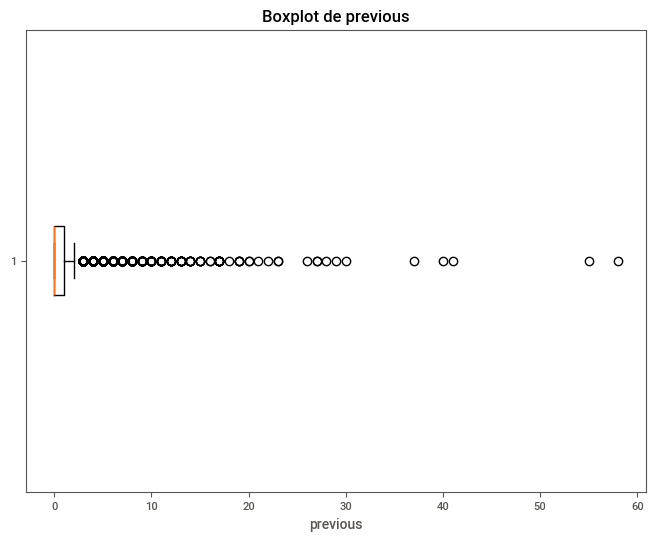

In [18]:

# Selecciono solo las columnas numéricas del DataFrame
columnas_numericas = df.select_dtypes(include=[np.number]).columns

# Bucle for para detectar outliers y crear un boxplot para cada columna numérica
for columna in columnas_numericas:
    # Cálculo de los límites de outliers usando el IQR
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrado de los outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    print(f"Outliers detectados en '{columna}':")
    print(outliers)
    
    # Creación del boxplot para cada columna 
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[columna], vert=False)
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)
    plt.show()


Se puede ver que excepto day, las demás variables presentan una dispersion de los datos con varios valores atípico (outliers).  
Voy a tratar los valaores de age para eliminar los outliers y para no afectar al DF original lo haré en una copia del mismo.

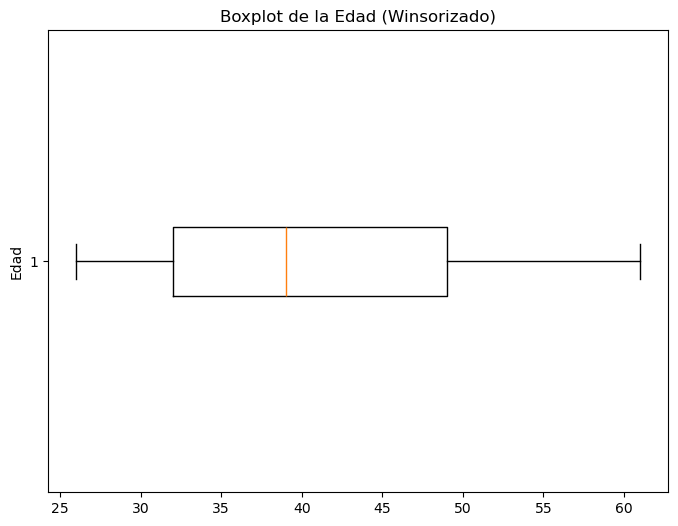

In [29]:
from scipy.stats.mstats import winsorize

df_copy = df.copy()

# Reemplazo los valores extremos en la columna 'age' por los valores de los percentiles 5 y 95.
df_copy['age'] = winsorize(df_copy['age'], limits=[0.05, 0.05])


# Creación del boxplot de la columna 'age' en el DataFrame winsorizado
plt.figure(figsize=(8, 6))
plt.boxplot(df_copy['age'], vert=False)
plt.title('Boxplot de la Edad (Winsorizado)')
plt.ylabel('Edad')
plt.show()



# Análisis de desbalance de clases (Variable Resultado)

Distribución de clases:
deposit
no     5873
yes    5289
Name: count, dtype: int64


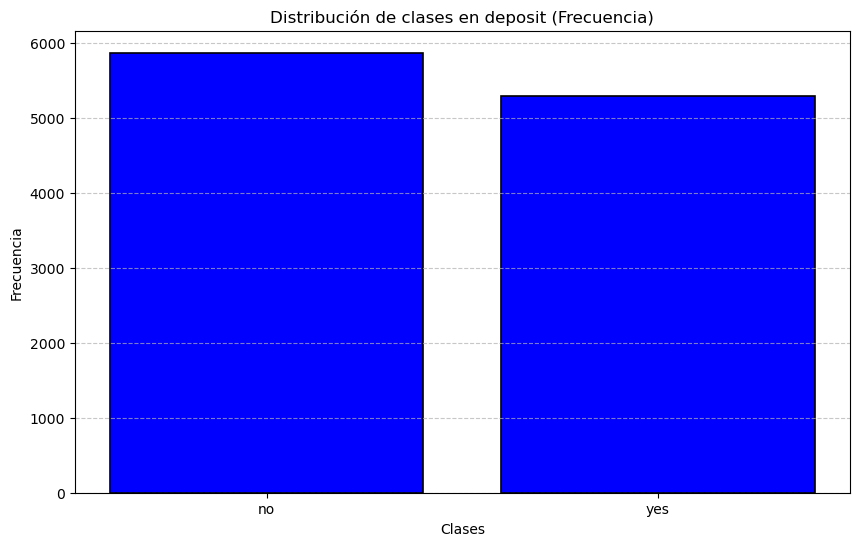

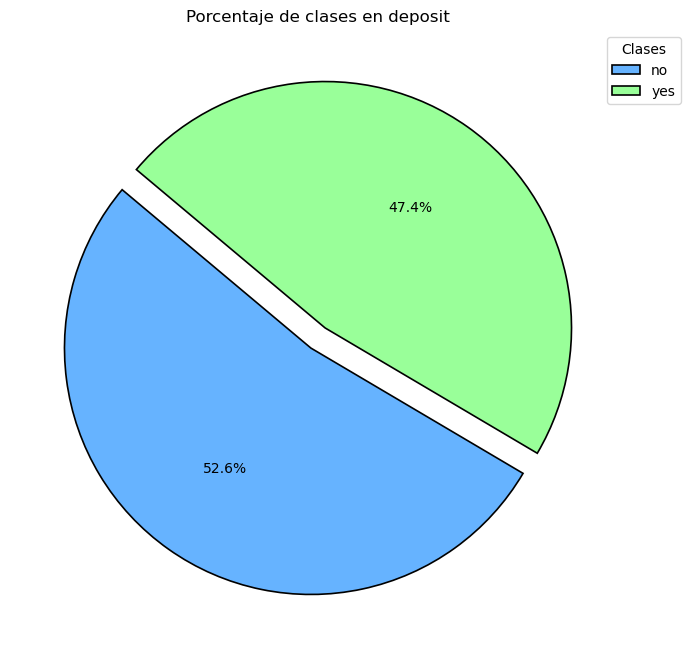

In [16]:

columna_clase = 'deposit'

# Conteo de clases
conteo_clases = df[columna_clase].value_counts()
porcentaje_clases = round(df[columna_clase].value_counts(normalize=True) * 100, 2)

# Imprimo el conteo de clases
print("Distribución de clases:")
print(conteo_clases)

# Visualización del desbalance de clases con gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(conteo_clases.index, conteo_clases.values, color='blue', edgecolor='black', linewidth=1.2)
plt.title(f'Distribución de clases en {columna_clase} (Frecuencia)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Imprimo el porcentaje de las clases
plt.figure(figsize=(8, 8))
plt.pie(
    porcentaje_clases,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
    explode=[0.05] * len(porcentaje_clases)  # separación entre segmentos
)
plt.title(f'Porcentaje de clases en {columna_clase}')
plt.legend(porcentaje_clases.index, title='Clases', loc='upper right', bbox_to_anchor=(1.1, 1))

plt.show()

Las clases las tenemos categorizadas en la columna deposit como yes y no . Esta es la información que clasifica a los ususarios en dos grupos, los que tienen un deposito a plazo ya contratado que sería el grupo de yes y los que no lo tienen que son los no.
Tenemos una gráfica de barras donde se hace un conteo sobre estas clasificasiones y también un pie chart donde se puede visualizar de manera sencilla el porcentaje que representa cada uno de estas clases.

# Relación entre las variables

Matriz de correlación:
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112242 -0.000696  0.000169 -0.005383  0.002802  0.020157
balance   0.112242  1.000000  0.010467  0.022436 -0.013894  0.017411  0.030805
day      -0.000696  0.010467  1.000000 -0.018511  0.137007 -0.077232 -0.058981
duration  0.000169  0.022436 -0.018511  1.000000 -0.041557 -0.027392 -0.026716
campaign -0.005383 -0.013894  0.137007 -0.041557  1.000000 -0.102726 -0.049699
pdays     0.002802  0.017411 -0.077232 -0.027392 -0.102726  1.000000  0.507272
previous  0.020157  0.030805 -0.058981 -0.026716 -0.049699  0.507272  1.000000


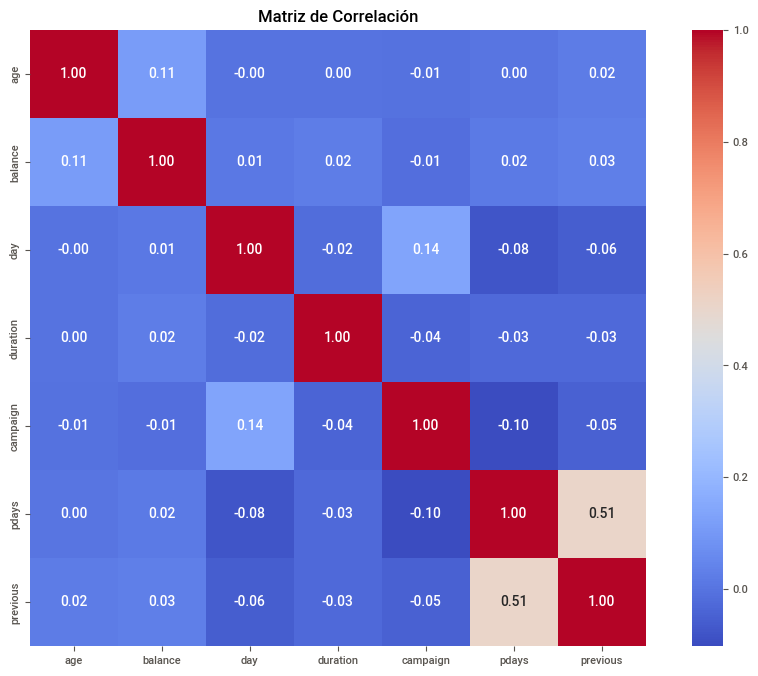

In [20]:
# Seleccionar solo las columnas numéricas
numerical_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Imprimir la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Matriz de Correlación')
plt.show()

Obtengo una vista de la correlación de las variables numérica entre si.

# Ahora agregaré la columa deposit dando el valor de 0 al no y el valor de 1 a yes para poder incluirla en el mapa de calor y poder analizar la relación que hay ente las variables numéricas y deposit

Matriz de correlación:
               age   balance       day  duration  campaign     pdays  \
age       1.000000  0.112242 -0.000696  0.000169 -0.005383  0.002802   
balance   0.112242  1.000000  0.010467  0.022436 -0.013894  0.017411   
day      -0.000696  0.010467  1.000000 -0.018511  0.137007 -0.077232   
duration  0.000169  0.022436 -0.018511  1.000000 -0.041557 -0.027392   
campaign -0.005383 -0.013894  0.137007 -0.041557  1.000000 -0.102726   
pdays     0.002802  0.017411 -0.077232 -0.027392 -0.102726  1.000000   
previous  0.020157  0.030805 -0.058981 -0.026716 -0.049699  0.507272   
deposit   0.034680  0.081129 -0.056326  0.451919 -0.128081  0.151593   

          previous   deposit  
age       0.020157  0.034680  
balance   0.030805  0.081129  
day      -0.058981 -0.056326  
duration -0.026716  0.451919  
campaign -0.049699 -0.128081  
pdays     0.507272  0.151593  
previous  1.000000  0.139867  
deposit   0.139867  1.000000  


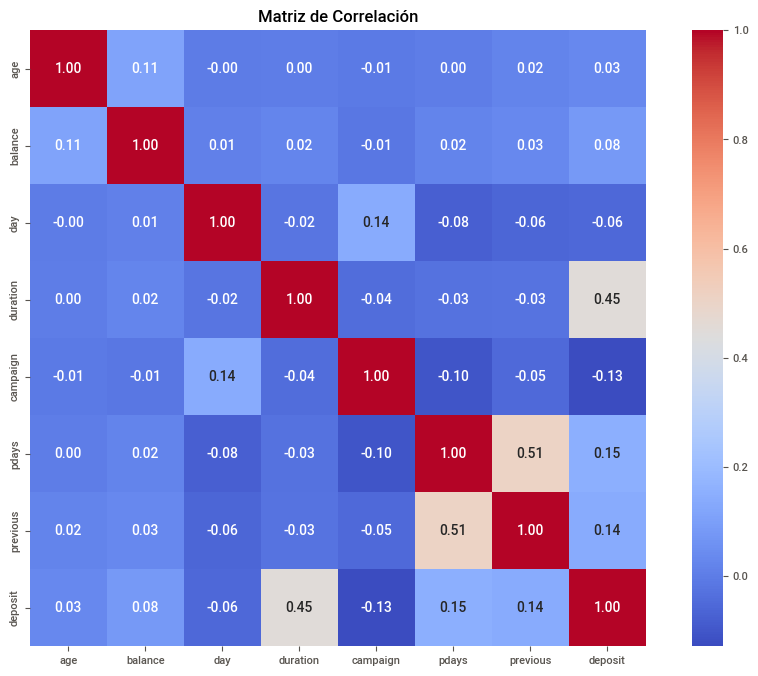

In [22]:
# Agrego la columna deposit a la correlacion 
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1}).astype(int)
# Seleccionar solo las columnas numéricas
numerical_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Imprimir la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Matriz de Correlación')
plt.show()

Se puede apreciar una relación fuerte entre duration y deposit, lo que sugiere que a mayor duración de la llamada, hay una mayor probabilidad de éxito en la contratación del depósito.

Además, se observa una relación moderada entre pdays y deposit, lo que indica que el número de días desde el último contacto también puede influir en la decisión de los clientes de suscribirse a un depósito. Sin embargo, esta relación es menos significativa en comparación con la que se establece entre duration y deposit.

# EDA automático con Sweetviz

In [17]:
report = sv.analyze(df)
report.show_html('EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Conclusiones:  
 Después de realizar este ejercicio de EDA, puedo concluir que estas herramientas, como Sweetviz, resultan extremadamente útiles para obtener una visión general de los datos, especialmente cuando se trabaja con grandes volúmenes de información. Nos permiten identificar rápidamente características clave sin necesidad de revisar los registros de forma manual.

 En cuanto a los datos analizados, he observado que hay muy pocos valores nulos en el DataFrame, representando menos del 1% de las entradas totales. Estos valores se encuentran en columnas no críticas, lo que sugiere que no es estrictamente necesario reemplazarlos para continuar con el análisis o la construcción de un modelo de Machine Learning en esta fase.No obstante, he procedido a remplazarlos utilizando la mediana y la moda a manera de práctica.

 Al revisar los outliers, se observa una alta dispersión en los datos, con muchos valores atípicos. Podemos abordar esto mediante la Winsorización ( como hice con age) para reemplazar estos outliers. Esto nos permitirá seguir un proceso de verificación y aplicar el modelo de manera segura, asegurando que el procesamiento de los datos sea correcto y que el comportamiento de los nuevos datos cumpla con nuestras expectativas.

 Sobre la correlacion de los datos he tratado solamente las variables numéricas donde he incluido la variable deposit que es la variable resultado , es decir ha donde apuntan los datos como éxito o no del análisis.
Según crea necesario podría hacer conversiones para cambiar datos que no sean numéricos por numéricos para poder incluirlos en el mapa de calor sigueindo el mismo proceso que hice con daposit pero de momento no lo veo necesario.

